In [111]:
import pandas as pd
import numpy 
from glob import glob
import os
import csv
import matplotlib.pyplot as plt


In [99]:
#the directories will be split into energy levels and order in pertubation *if* it is LO in the pertubation 
#then there will be another splitting based on as 130 or 118

#for the file structure H_PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)

In [100]:
# data = pd.read_csv("/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/results_PDF_NNPDF31_lo_as_0118_EFT_NoSmallX.csv")
#files will be stored in .../resultsHiggs/Energy_#LO_asValue/fileName (for 1300)
#fileName will be #PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)


In [ ]:
#LO in 'as' value of 130 with E of 13000 (using this one to test with you can ignore the rest)
seperateLO1300_130 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/**/*as_0130*.csv',recursive=True)

LO1300_130 = pd.concat([pd.read_csv(f) for f in seperateLO1300_130 ], ignore_index=True)

dataLO1300_130 = LO1300_130.to_numpy()


In [ ]:
#LO in 'as' value of 118 with E of 13000
seperateLO1300_118 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1300/QCDOrder_LO/**/*as_0118*.csv',recursive=True)

LO1300_118 = pd.concat([pd.read_csv(f) for f in seperateLO1300_118 ], ignore_index=True)

dataLO1300_118 = LO1300_118.to_numpy()

In [ ]:
#LO w/ 'as' value of 130 w/ E of 13600
seperateLO1360_130 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_LO/**/*as_0130*.csv',recursive=True)

LO1360_130 = pd.concat([pd.read_csv(f) for f in seperateLO1360_130 ], ignore_index=True)

dataLO1360_118 = LO1360_130.to_numpy()


In [ ]:
#LO w/ 'as' value of 118 w/ E of 13600
seperateLO1360_118 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_LO/**/*as_0118*.csv',recursive=True)

LO1360_118 = pd.concat([pd.read_csv(f) for f in seperateLO1360_118 ], ignore_index=True)

dataLO1360_118 = LO1300_130.to_numpy()


In [ ]:
seperateNLO1300 = glob('/home/ananda/Documents/UCSB/Research_Particle_Phys/afiles/ggHiggs/SQRT1360/QCDOrder_LO/**/*.csv',recursive=True)

LO1360_118 = pd.concat([pd.read_csv(f) for f in seperateLO1360_118 ], ignore_index=True)

dataLO1360_118 = LO1300_130.to_numpy()


In [106]:
LO1300

'SQRT1300/LO'

In [107]:
data1300[:,1]

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [108]:
parentDir = "/home/ananda/Documents/UCSB/Research_Particle_Phys/results/"
LO1300_130 = "SQRT1300/LO/as_130"
LO1300_118 = "SQRT1300/LO/as_118"
NLO1300 = "SQRT1300/NLO"
NNLO1300 = "SQRT1300/NNLO"
N3LO1300 = "SQRT1300/N3LO"

In [121]:
#this is for the LO1300_130 data
LO1300_130_path = parentDir+LO1300_130
os.makedirs(LO1300_130_path,exist_ok=True)   
massCharm = dataLO1300_130[:,2]
massBottom = dataLO1300_130[:,3]
smallX = dataLO1300_130[:,5]
mH = dataLO1300_130[:,7]
smur = dataLO1300_130[:,8]
massTop = dataLO1300_130[:,9]
xsection = dataLO1300_130[:,12]
smuf = dataLO1300_130[:,13]

In [127]:
#for the file structure H_PDFValue_smur_smuf_smallx(0,1)_#particleDecayedInto (0,1,2,3)
files = glob(LO1300_130_path+"/*")
for f in files:
    os.remove(f)
for idx,j in enumerate(mH):
    fileName = "/H_"
    fileName = fileName + "0_" + str(smur[idx]) +"_"+ str(smuf[idx])+"_"
    if smallX[idx]:
        fileName = fileName + "1_"
    else:
        fileName = fileName + "0_"
        
    if massTop[idx] == -1:
        fileName = fileName + "0.csv"
    elif massBottom[idx] == -1:
        fileName = fileName + "1.csv"
    elif massCharm[idx] == -1:
        fileName = fileName + "2.csv"
    else:
        fileName = fileName + "3.csv"
        
    file = open(LO1300_130_path+fileName,'a+')
    print(LO1300_130_path+fileName)
    point = [j,xsection[idx]]
    writer = csv.writer(file)
    writer.writerow(point)
    
#     file.write

/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_1.csv
/home/ananda/Doc

/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_1_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_1_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_1_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_1_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_1_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_1_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_1_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_1_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_1_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_1_0.csv
/home/ananda/Doc

/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_1.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_1_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_1_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_1_3.csv
/home/ananda/Doc

/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_1_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_1_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_1_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_1_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_1_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_3.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_3.csv
/home/ananda/Doc

/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_1_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_1_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.25_0_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_1.0_0_0.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.25_0.5_0_2.csv
/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_1.0_0.5_0_2.csv
/home/ananda/Doc

In [138]:
x = []
y = []

with open('/home/ananda/Documents/UCSB/Research_Particle_Phys/results/SQRT1300/LO/as_130/H_0_0.5_0.5_0_0.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(row[1])
for idx,val in enumerate(x):
    if val == "125":
        print(y[idx])
    if val == "1000":
        print(y[idx])

  


21.090999999999998
0.07874439999999999


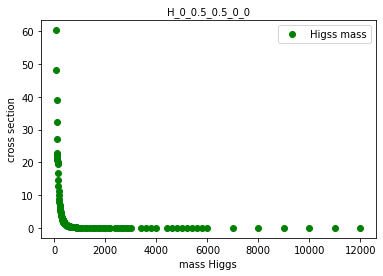

In [157]:
# new_x, new_y = zip(*sorted(zip(x, y))) #this is used to sort x values (not needed but nice to know)
plt.plot(numpy.array(list(x),dtype=numpy.float32), numpy.array(list(y),dtype=numpy.float32),'o', color = 'g', marker = "o",label = "Higss mass")
  
# plt.xticks(rotation = 25)
plt.xlabel('mass Higgs')
plt.ylabel('cross section')
plt.title('H_0_0.5_0.5_0_0', fontsize = 10)
# plt.grid()
plt.legend()
plt.show()

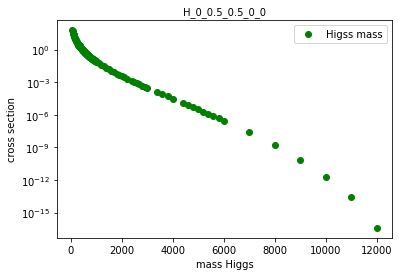

In [159]:
plt.plot(numpy.array(list(x),dtype=numpy.float32), numpy.array(list(y),dtype=numpy.float32),'o', color = 'g', marker = "o",label = "Higss mass")
  
# plt.xticks(rotation = 25)
plt.xlabel('mass Higgs')
plt.ylabel('cross section')
plt.title('H_0_0.5_0.5_0_0', fontsize = 10)
# plt.grid()
plt.legend()
plt.yscale("log")
plt.show()

In [101]:

print(data)
array = data[0:1]

   xsec_N3LO  QCDorder  mc  mb  sqrts  smallx  xsec_NNLO  mH  smur  mt  \
0    168.884         0  -1  -1  13000   False    162.560  70  0.50  -1   
1    168.128         0  -1  -1  13000   False    181.050  70  0.25  -1   
2    160.517         0  -1  -1  13000   False    142.572  70  1.00  -1   
3    167.507         0  -1  -1  13000   False    158.957  70  0.50  -1   
4    170.266         0  -1  -1  13000   False    165.621  70  0.50  -1   

   KFactor_EW  PDFmem  xsec_LO  smuf              PDFset   as(muR)  xsec_NLO  
0          -1       0  50.0956  0.50  NNPDF31_lo_as_0118  0.138072   124.951  
1          -1       0  65.3091  0.50  NNPDF31_lo_as_0118  0.157650   159.319  
2          -1       0  39.7046  0.50  NNPDF31_lo_as_0118  0.122921   100.779  
3          -1       0  44.0440  0.25  NNPDF31_lo_as_0118  0.138072   117.812  
4          -1       0  54.8141  1.00  NNPDF31_lo_as_0118  0.138072   130.382  


In [102]:
array[0:2]

,xsec_N3LO,QCDorder,mc,mb,sqrts,smallx,xsec_NNLO,mH,smur,mt,KFactor_EW,PDFmem,xsec_LO,smuf,PDFset,as(muR),xsec_NLO
0,168.884,0,-1,-1,13000,False,162.56,70,0.5,-1,-1,0,50.0956,0.5,NNPDF31_lo_as_0118,0.138072,124.951


In [103]:
dataNp = data.to_numpy()

In [104]:
print(dataNp[:,2])

[-1 -1 -1 -1 -1]


In [105]:
dataNp

array([[168.88400000000001, 0, -1, -1, 13000, False, 162.56, 70, 0.5, -1,
        -1, 0, 50.0956, 0.5, 'NNPDF31_lo_as_0118', 0.138072,
        124.95100000000001],
       [168.128, 0, -1, -1, 13000, False, 181.05, 70, 0.25, -1, -1, 0,
        65.3091, 0.5, 'NNPDF31_lo_as_0118', 0.15765, 159.319],
       [160.517, 0, -1, -1, 13000, False, 142.572, 70, 1.0, -1, -1, 0,
        39.7046, 0.5, 'NNPDF31_lo_as_0118', 0.122921, 100.779],
       [167.507, 0, -1, -1, 13000, False, 158.957, 70, 0.5, -1, -1, 0,
        44.044, 0.25, 'NNPDF31_lo_as_0118', 0.138072, 117.81200000000001],
       [170.266, 0, -1, -1, 13000, False, 165.62099999999998, 70, 0.5,
        -1, -1, 0, 54.8141, 1.0, 'NNPDF31_lo_as_0118', 0.138072, 130.382]],
      dtype=object)